## The Sparks Foundation - GRIP - Data Science and Business Analytics - DEC'2021
## TASK 3 : Prediction Using Decision Tree Algorithm
## Author: Annine Duclaire Kenne
Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

### Import necessary libraries


In [80]:
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import warnings
warnings.filterwarnings('ignore')

## Load Iris dataset

In [30]:
# Load and store in a dataframe
iris = pd.read_csv('/content/drive/MyDrive/Internship/Sparks Foundation/Notebooks/task3/Iris.csv')

# Forming the iris dataframe
iris1=datasets.load_iris()

In [3]:
iris.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# Print the first five rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Print the last five rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Data Visualization

In [6]:
# Drop unwanted column
df = iris.drop(['Id'], axis=1)

In [7]:
# Check the shape of the data
df.shape

(150, 5)

In [8]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Check missing values
print(df.isnull().sum())
print('\n')
print(f'The total number of missing is:{df.isnull().sum().sum()}')

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


The total number of missing is:0


In [10]:
# Statistics descriptive
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ad565e50>,
      dtype=object)

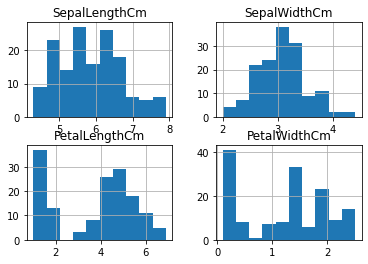

In [11]:
# Histogram
df.hist(bins=10)

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


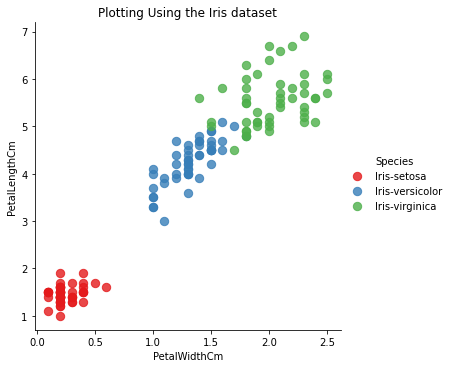

In [13]:
#--Plot the lmplot--
sns.lmplot('PetalWidthCm', 'PetalLengthCm', data=df, hue='Species', palette='Set1', fit_reg=False, scatter_kws={'s':70})
#--get the current polar axes on the figures--
ax = plt.gca()
ax.set_title('Plotting Using the Iris dataset') 
#--show the plot--
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


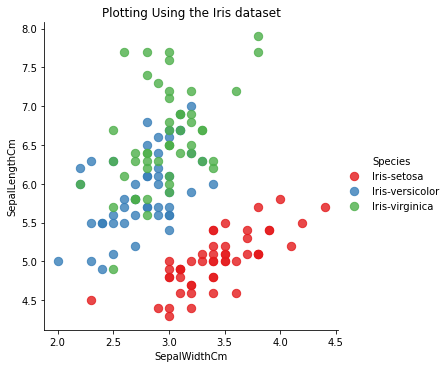

In [15]:
#--Plot the lmplot--
sns.lmplot('SepalWidthCm', 'SepalLengthCm', data=df, hue='Species', palette='Set1', fit_reg=False, scatter_kws={'s':70})
#--get the current polar axes on the figures--
ax = plt.gca()
ax.set_title('Plotting Using the Iris dataset') 
#--show the plot--
plt.show()

### Features selection
We are going to separate the features to the target of the Iris dataset.

In [55]:
X = iris1.data
y = iris1.target

In [56]:
# view the target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Split the dataset into Training and testing data

In [57]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# view the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Decision Tree Algorithm

In [62]:
# Create the model
dtree = DecisionTreeClassifier()
# Train the model
dtree.fit(X_train, y_train)
# Making prediction
y_pred = dtree.predict(X_test)

### Compare the actual to the predicted values

In [67]:
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


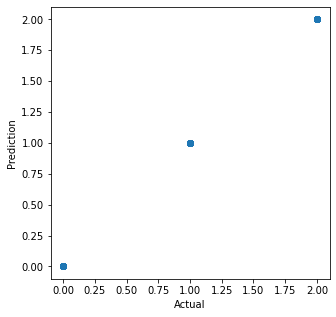

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(prediction.Actual, prediction.Predicted)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

### Model performance
To access the performance of applied ML models, four statistical performance evaluation criteria have
been used such as R2, MAE, MSE and MAPE

In [81]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'The r2 score is:{r2:.2f}')
print('The mean squared error is:', mse)
print(f'The mean absolute error is:{mae:.2f}')
print(f'The mean absolute percentage error is:{mape:.2f}')

The r2 score is:1.00
The mean squared error is: 0.0
The mean absolute error is:0.00
The mean absolute percentage error is:0.00


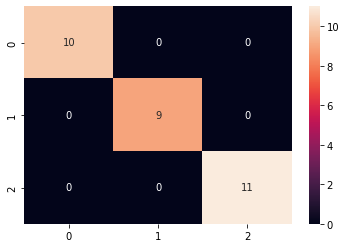

In [76]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the heatmap
sns.heatmap(cm, annot=True)
plt.show()

In [78]:
#  Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Our model achieved a score of **100%**.

## Visualizing Decision Tree

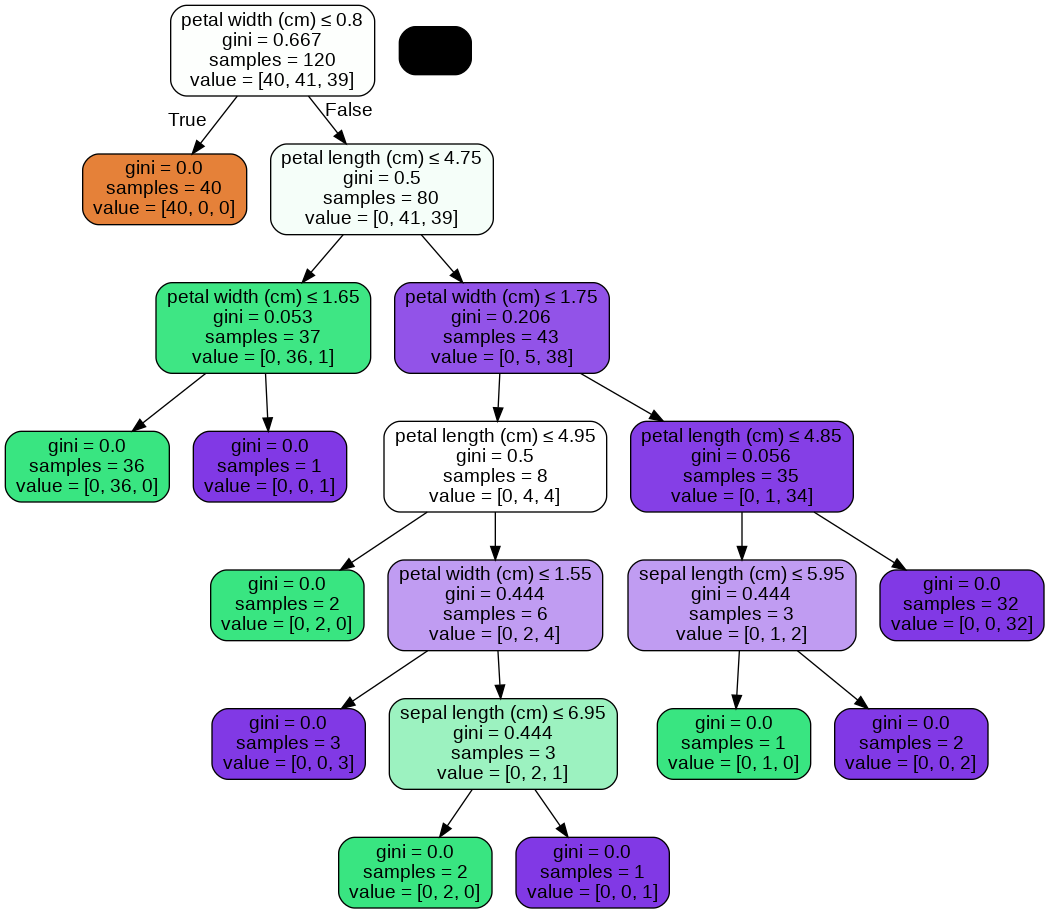

In [79]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris1.feature_names,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Conclusion:
Sucessfully completing Decision tree prediction task with a best score.